<a href="https://colab.research.google.com/github/Harsha1569/DSP_Lab/blob/main/Experiment_3/Experiment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: Roll Number = 191EE123 <br> a = 1 + mod(123,4) = 4

In [1]:
import numpy as np
import IPython
import scipy
import math
import pandas as pd
import io
from IPython.display import Audio, display
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import find_peaks



a = 4
pi = np.pi


%matplotlib inline
plt.style.use(['seaborn-notebook'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (15, 8),
    "axes.labelsize": 15,
    "font.size": 8})

# **Problem** **1**. <br>
Part 1:

In [2]:
Fs1, track1= wavfile.read('flute4.wav')
Fs2, track2= wavfile.read('piano4.wav')
Fs3, track3= wavfile.read('trumpet4.wav')
Fs4, track4= wavfile.read('violin4.wav')

track1 = track1/32767.0
track2 = track2/32767.0
track3 = track3/32767.0
track4 = track4/32767.0

print('Sampling rate of flute : {}Hz'.format(Fs1))
print('Size of flute signal: {}'.format(track1.shape))
print('Sampling rate of piano : {}Hz'.format(Fs2))
print('Size of piano signal: {}'.format(track2.shape))
print('Sampling rate of trumpet : {}Hz'.format(Fs3))
print('Size of trumpet signal: {}'.format(track3.shape))
print('Sampling rate of violin : {}Hz'.format(Fs4))
print('Size of violin signal: {}'.format(track4.shape))

display(Audio(data=track1, rate=Fs1))
display(Audio(data=track2, rate=Fs2))
display(Audio(data=track3, rate=Fs3))
display(Audio(data=track4, rate=Fs4))


Sampling rate of flute : 11025Hz
Size of flute signal: (36750,)
Sampling rate of piano : 11025Hz
Size of piano signal: (11250,)
Sampling rate of trumpet : 11025Hz
Size of trumpet signal: (86083,)
Sampling rate of violin : 11025Hz
Size of violin signal: (36750,)


In [3]:
def mag_spec(x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    Y = 20*np.log(X)
    Z = (np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    return N, Y, X, Z
    
frequency_1, magnitude_spectrum_1, ms_1, s_1 = mag_spec(track1, Fs1, Fs1/2)
frequency_2, magnitude_spectrum_2, ms_2, s_2= mag_spec(track2, Fs2, Fs2/2)
frequency_3, magnitude_spectrum_3, ms_3, s_3 = mag_spec(track3, Fs3, Fs3/2)
frequency_4, magnitude_spectrum_4, ms_4, s_4 = mag_spec(track4, Fs4, Fs4/2)

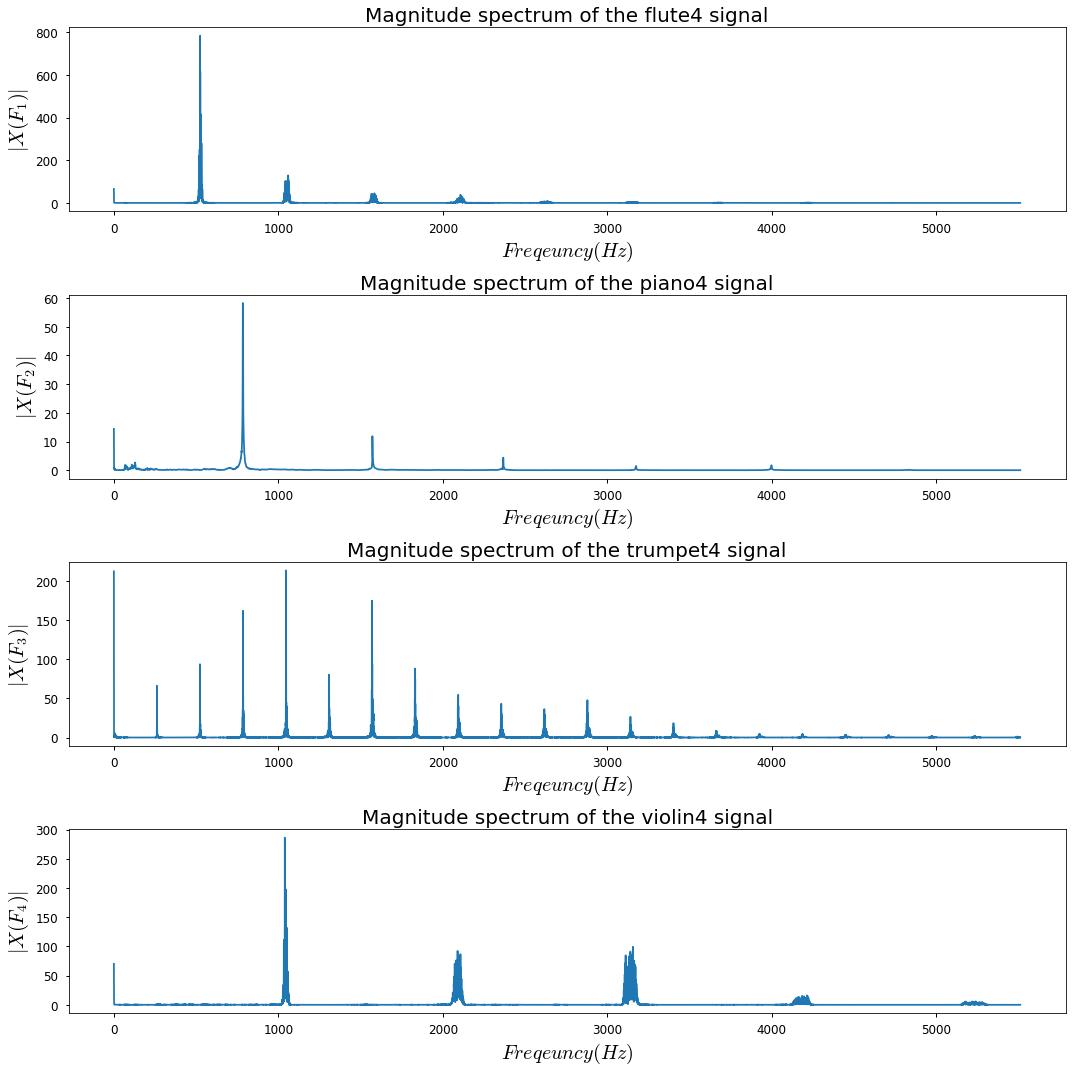

In [49]:
title = ['Magnitude spectrum of the flute4 signal','Magnitude spectrum of the piano4 signal','Magnitude spectrum of the trumpet4 signal','Magnitude spectrum of the violin4 signal']
fig, axs = plt.subplots(4, figsize=(15,15))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].plot(x, y)
    axs[row].set_title(title[row], fontsize = 20)
    axs[row].set_xlabel(xaxis_label, fontsize = 20)
    axs[row].set_ylabel(yaxis_label, fontsize = 20)
    axs[row].tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot_signal(frequency_1, ms_1, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F_1)|$', row=0)
plot_signal(frequency_2, ms_2, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F_2)|$', row=1)
plot_signal(frequency_3, ms_3, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F_3)|$', row=2)
plot_signal(frequency_4, ms_4, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F_4)|$', row=3)
fig.savefig('fig2.png')

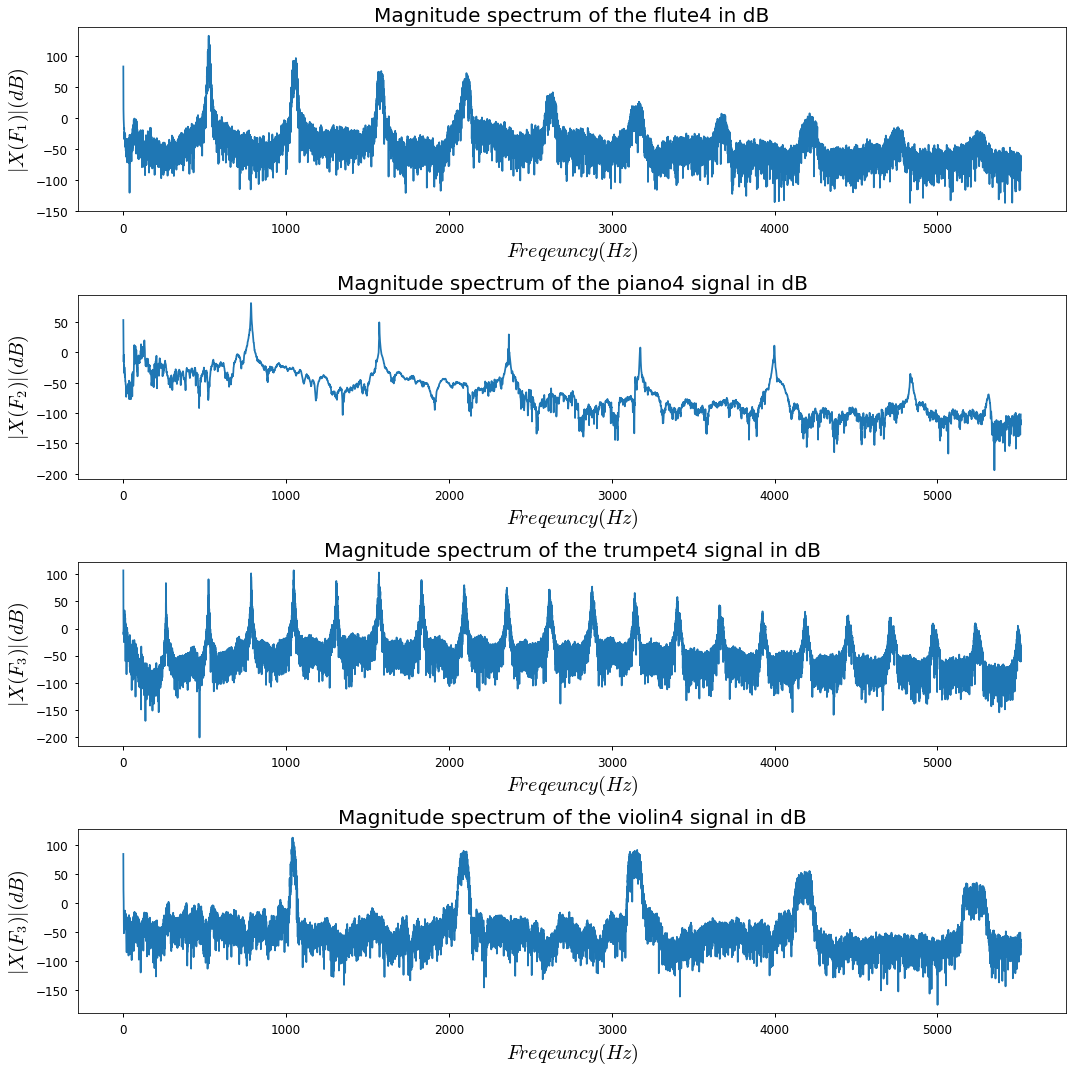

In [50]:
title = ['Magnitude spectrum of the flute4 in dB','Magnitude spectrum of the piano4 signal in dB','Magnitude spectrum of the trumpet4 signal in dB','Magnitude spectrum of the violin4 signal in dB']
fig, axs = plt.subplots(4, figsize=(15,15))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].plot(x, y)
    axs[row].set_title(title[row], fontsize = 20)
    axs[row].set_xlabel(xaxis_label, fontsize = 20)
    axs[row].set_ylabel(yaxis_label, fontsize = 20)
    axs[row].tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot_signal(frequency_1, magnitude_spectrum_1, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F_1)|(dB)$', row=0)
plot_signal(frequency_2, magnitude_spectrum_2, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F_2)|(dB)$', row=1)
plot_signal(frequency_3, magnitude_spectrum_3, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F_3)|(dB)$', row=2)
plot_signal(frequency_4, magnitude_spectrum_4, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F_3)|(dB)$', row=3)
fig.savefig('fig1.png')

In [6]:
def find_ff(track, frequency):
  TRACK = fft(track)
  max_val = np.max(np.abs(TRACK))
  TRACK = TRACK/max_val
  for i in range (len(TRACK)):
    if (np.abs(TRACK[i])<=0.1):
      TRACK[i]=0;
    elif (i==0):
      TRACK[i]=0 

  TRACK_peaks = sp.find_peaks(np.abs(TRACK))[0] 
  fundamental_frequency = (TRACK_peaks[0]/len(TRACK)) *frequency
  return fundamental_frequency

fundamental_frequency_1 = find_ff(track1, Fs1)
fundamental_frequency_2 = find_ff(track2, Fs2)
fundamental_frequency_3 = find_ff(track3, Fs3)
fundamental_frequency_4 = find_ff(track4, Fs4)

print('The Fundamental frequency of the flute4 audio signal: {} Hz'.format(fundamental_frequency_1))
print('The Fundamental frequency of the piano4 audio signal: {} Hz'.format(fundamental_frequency_2))
print('The Fundamental frequency of the trumpet4 audio signal: {} Hz'.format(fundamental_frequency_3))
print('The Fundamental frequency of the violin4 audio signal: {} Hz'.format(fundamental_frequency_4))

The Fundamental frequency of the flute4 audio signal: 518.1 Hz
The Fundamental frequency of the piano4 audio signal: 776.1600000000001 Hz
The Fundamental frequency of the trumpet4 audio signal: 261.6553210273805 Hz
The Fundamental frequency of the violin4 audio signal: 1027.8 Hz


Part 2:

In [7]:
Fs_1, track_1 = wavfile.read('piano4.wav')
Fs_2, track_2 = wavfile.read('flute1.wav')
Fs_3, track_3 = wavfile.read('flute2.wav')
Fs_4, track_4 = wavfile.read('flute3.wav')
Fs_5, track_5 = wavfile.read('flute4.wav')

track_1 = track_1/32767.0
track_2 = track_2/32767.0
track_3 = track_3/32767.0
track_4 = track_4/32767.0
track_5 = track_5/32767.0

def find_ff(track, frequency):
  TRACK = fft(track)
  max_val = np.max(np.abs(TRACK))
  TRACK = TRACK/max_val
  for i in range (len(TRACK)):
    if (np.abs(TRACK[i])<=0.1):
      TRACK[i]=0;
    elif (i==0):
      TRACK[i]=0 

  TRACK_peaks = sp.find_peaks(np.abs(TRACK))[0] 
  fundamental_frequency = (TRACK_peaks[0]/len(TRACK)) *frequency
  return fundamental_frequency

ff_1 = find_ff(track_1, Fs_1)
ff_2 = find_ff(track_2, Fs_2)
ff_3 = find_ff(track_3, Fs_3)
ff_4 = find_ff(track_4, Fs_4)
ff_5 = find_ff(track_5, Fs_5)

print('The Fundamental frequency of the piano4 audio signal: {} Hz'.format(ff_1))
print('The Fundamental frequency of the flute1 audio signal: {} Hz'.format(ff_2))
print('The Fundamental frequency of the flute2 audio signal: {} Hz'.format(ff_3))
print('The Fundamental frequency of the flute3 audio signal: {} Hz'.format(ff_4))
print('The Fundamental frequency of the flute4 audio signal: {} Hz'.format(ff_5))


The Fundamental frequency of the piano4 audio signal: 776.1600000000001 Hz
The Fundamental frequency of the flute1 audio signal: 1034.7 Hz
The Fundamental frequency of the flute2 audio signal: 256.69241379310347 Hz
The Fundamental frequency of the flute3 audio signal: 775.4496644295302 Hz
The Fundamental frequency of the flute4 audio signal: 518.1 Hz


Thus, from the above observation we notice $\beta = 3$ <br> i.e., the required $\beta$ value for the $flute\beta.wav$ which is closest to my $piano\alpha.wav$ in terms of the fundamental frequency is 3.

# **Problem** **2**. <br>
Part1 :


# **Problem** **3**. <br>

In [9]:
F_s, opera_track = wavfile.read('Opera.wav')
opera_track = opera_track/32767.0
print('Sampling rate: {}Hz'.format(F_s))
display(Audio(data=opera_track, rate=F_s))
print('Size of the Opera audio signal: {}'.format(opera_track.shape))

Sampling rate: 44100Hz


Size of the Opera audio signal: (220500,)


In [59]:
def spec(x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    return N, X

frequency = []
spectrum = []
arr = []

start_point = 0
end_point = 0
temp = int(opera_track.shape[0]/ 10)


for i in range(10):
  end_point += temp
  arr.append(opera_track[start_point : end_point])
  start_point = end_point + 1

for j in range(10):
  temp1, temp2 = spec(arr[j], F_s, F_s//2)
  frequency.append(temp1)
  spectrum.append(temp2)


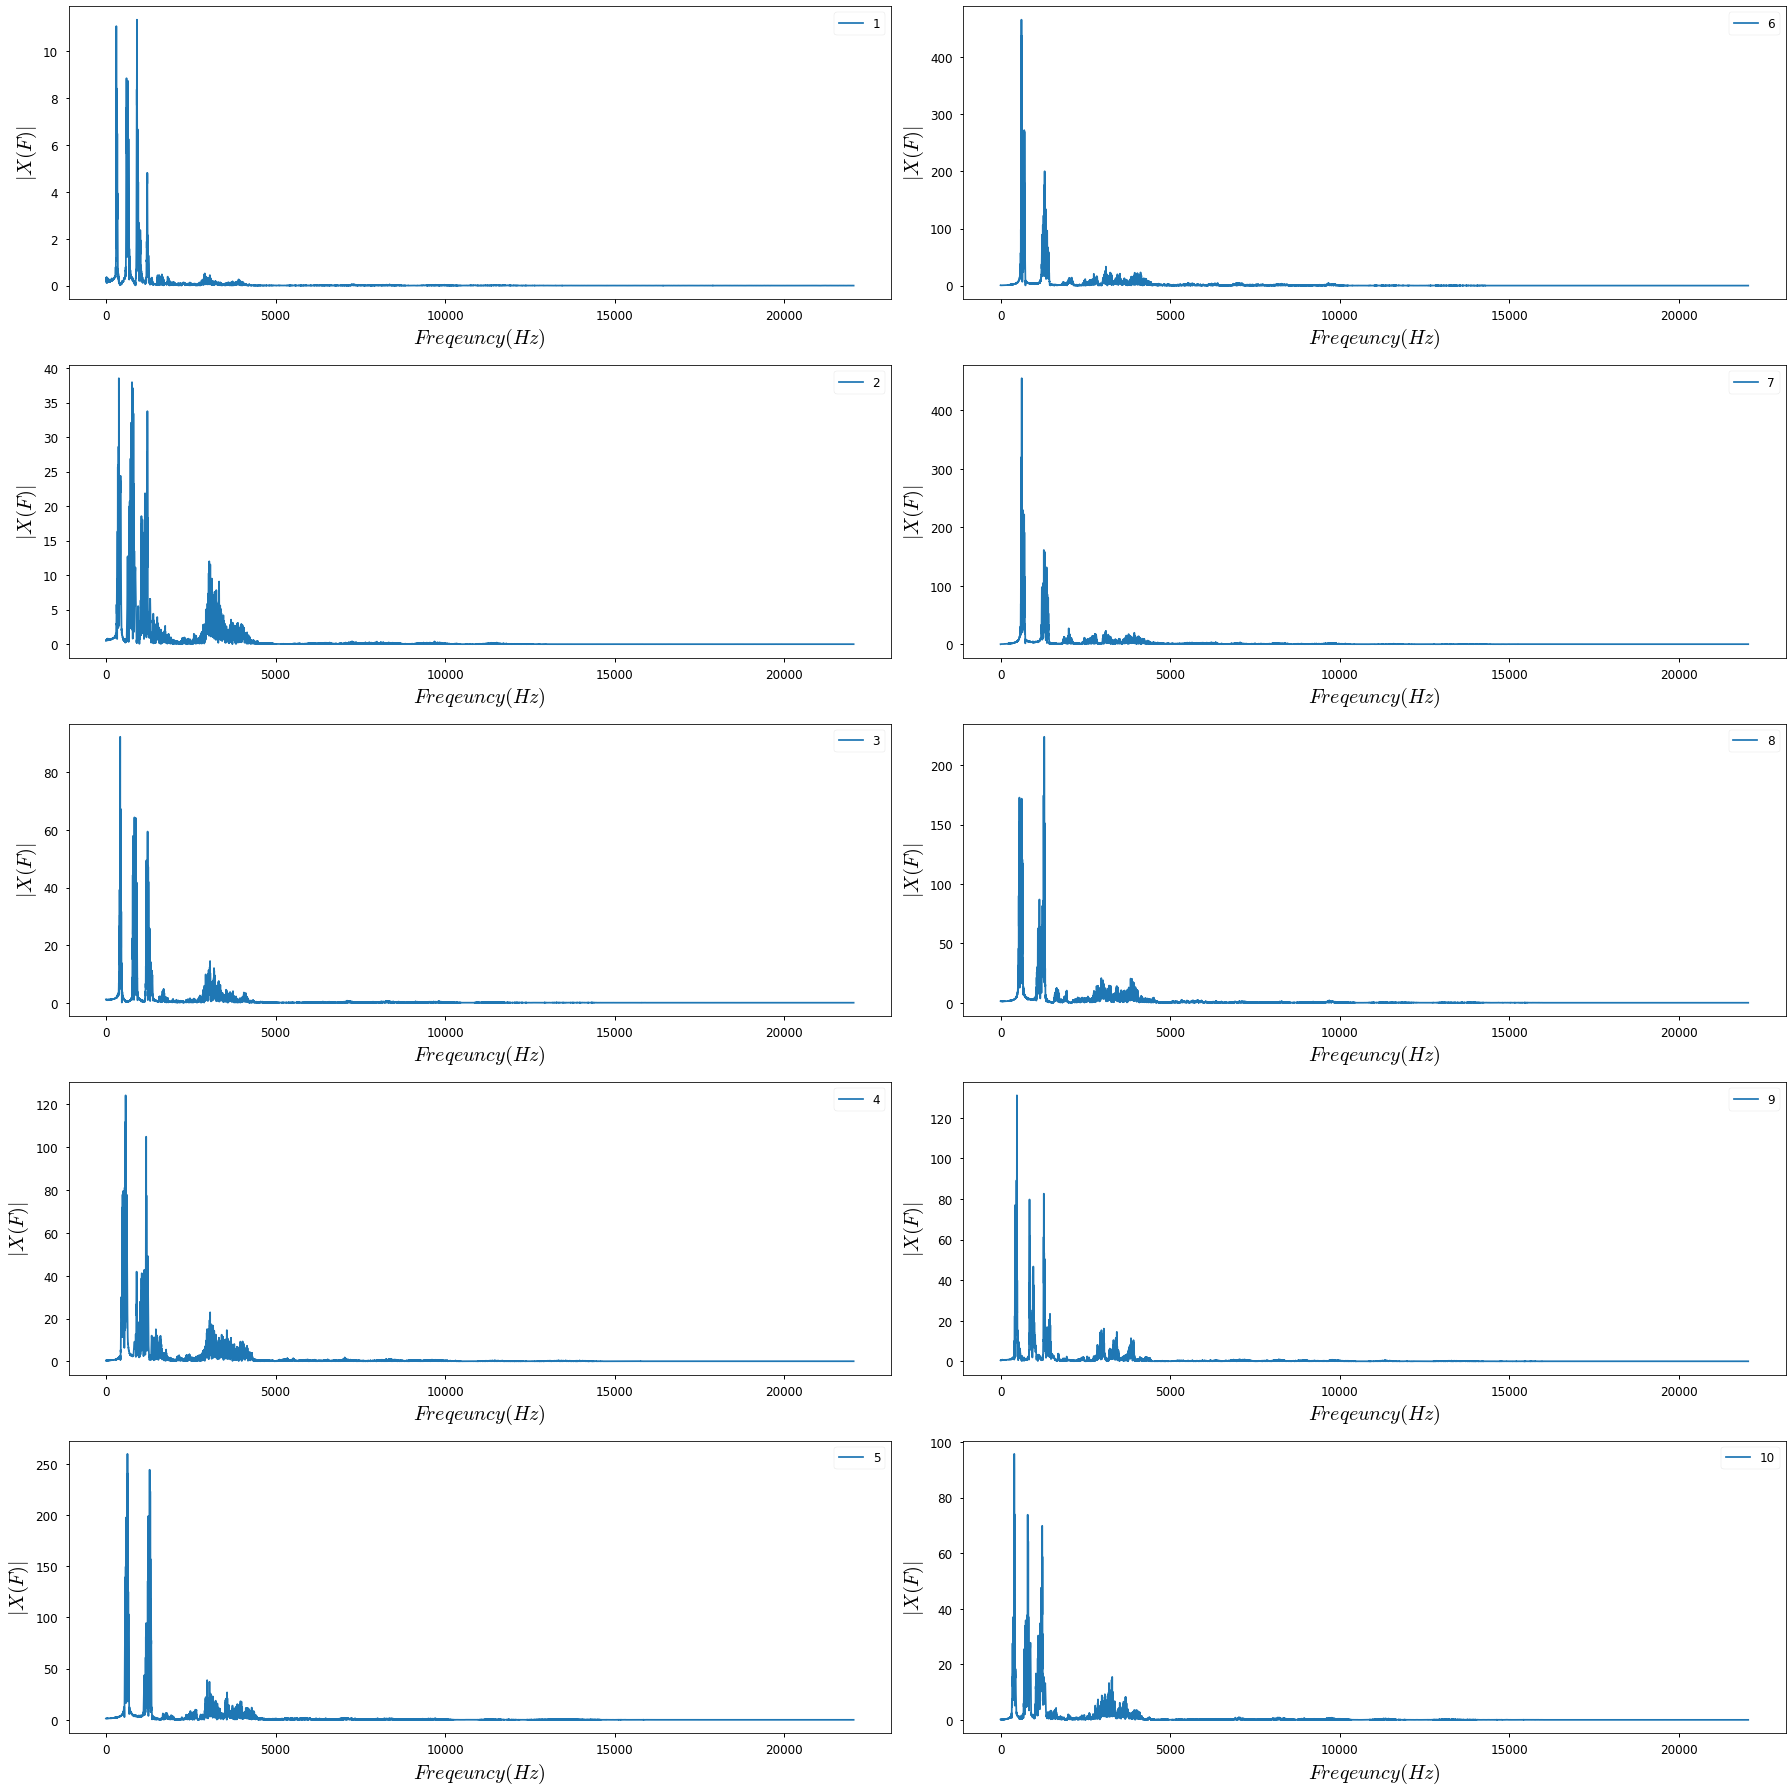

In [67]:
fig, axs = plt.subplots(5,2, figsize=(25,25))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None, column=None, legend=None):  
    axs[row,column].plot(x, y, label = legend+1)
    axs[row,column].legend(loc = 'upper right', fontsize = 12)
    #axs[row].set_title(title[row], fontsize = 20)
    axs[row,column].set_xlabel(xaxis_label, fontsize = 20)
    axs[row,column].set_ylabel(yaxis_label, fontsize = 20)
    axs[row,column].tick_params(axis="both", labelsize = 12)
    fig.tight_layout()

for j in range(10):
  if (j<5):
    plot_signal(frequency[j], spectrum[j], xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F)|$', row=j, column=0, legend=j)
  else:
    plot_signal(frequency[j], spectrum[j], xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F)|$', row=j-5, column=1, legend=j)   

fig.savefig('fig3.png')